# Projeto de Análise Exploratória de Dados
## O projeto consiste na análise exploratória da base de dados de avaliação de cervejas.
### Grupo: Cristoferson, Jean, João Pedro, Lucas, Natalie

<p>Abrindo a base da dados e realizando a busca de todos os dados</p>

In [ ]:
import pandas as pd

dados = pd.read_csv('beer_reviews.csv')
dados

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


### Esse filtro mostra apenas as cervejas que foram avaliadas mais de 2500 vezes

In [ ]:
cervejas = dados.groupby('beer_name').size().reset_index(name='contagem')
cervejas_filtradas = cervejas[cervejas['contagem'] > 2500]
                                                         
cervejas_filtradas

,beer_name,contagem
900,90 Minute IPA,3290
3133,Arrogant Bastard Ale,2704
19338,Founders Breakfast Stout,2502
26117,India Pale Ale,3130
36868,Old Rasputin Russian Imperial Stout,3111
39649,Pliny The Elder,2527
45811,Sierra Nevada Celebration Ale,3000
45827,Sierra Nevada Pale Ale,2587
48595,Stone IPA (India Pale Ale),2575
48638,Stone Ruination IPA,2704


#### Grafico das cervejas que foram avaliadas mais de 2500 vezes

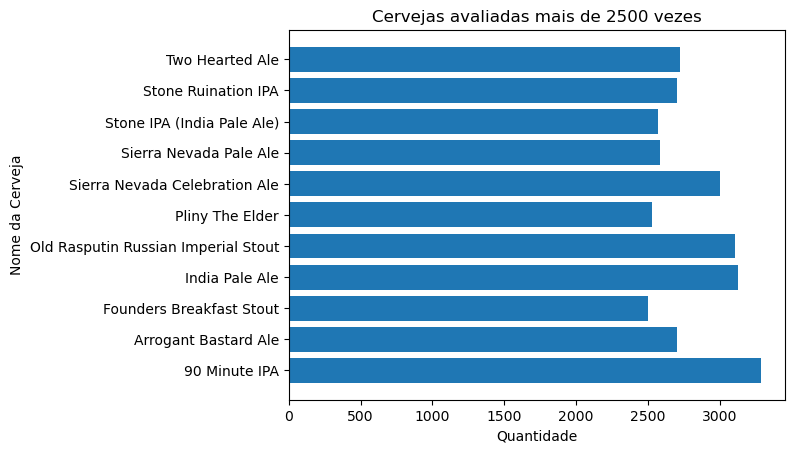

In [ ]:
plt.barh(cervejas_filtradas['beer_name'], cervejas_filtradas['contagem'])
plt.xlabel('Quantidade')
plt.ylabel('Nome da Cerveja')
plt.title('Cervejas avaliadas mais de 2500 vezes')
plt.show()

<p>A cerveja que mais vezes foi avaliada foi a 90 Minute IPA<p/>

In [10]:
cervejas_filtradas.describe()

,contagem
count,11.000000
mean,2805.272727
std,277.192746
min,2502.000000
25%,2581.000000
50%,2704.000000
75%,3055.500000
max,3290.000000


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [4]:
import matplotlib.pyplot as plt

### Agrupamento e agregações por estilo de cerveja
<p> obs: Nos gráficos abaixo optamos por mostrar apenas o top 20, pois eram muitos dados<p/>

#### Buscando por todos os estilos de cerveja


In [56]:
total_estilos = dados.groupby(by = ['beer_style']).count()
total_estilos

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,beer_name,beer_abv,beer_beerid
beer_style,,,,,,,,,,,,
Altbier,7741,7741,7741,7741,7741,7741,7737,7741,7741,7741,7223,7741
American Adjunct Lager,30749,30748,30749,30749,30749,30749,30734,30749,30749,30749,28979,30749
American Amber / Red Ale,45751,45751,45751,45751,45751,45751,45740,45751,45751,45751,41740,45751
American Amber / Red Lager,9311,9311,9311,9311,9311,9311,9309,9311,9311,9311,8610,9311
American Barleywine,26728,26728,26728,26728,26728,26728,26721,26728,26728,26728,26274,26728
...,...,...,...,...,...,...,...,...,...,...,...,...
Vienna Lager,8954,8952,8954,8954,8954,8954,8951,8954,8954,8954,8339,8954
Weizenbock,9412,9412,9412,9412,9412,9412,9412,9412,9412,9412,9251,9412
Wheatwine,3714,3714,3714,3714,3714,3714,3714,3714,3714,3714,3598,3714


#### Média de avaliação do aroma, filtrando por tipo estilo de cerveja

In [58]:
agrupamento_nota_aroma_estilo = dados.groupby(by=[    
    'beer_style',
]).agg(
   media_de_avaliacao_aroma_estilo = ('review_aroma','mean')
)
agrupamento_nota_aroma_estilo = agrupamento_nota_aroma_estilo.sort_values(by = 'media_de_avaliacao_aroma_estilo', ascending = False)
agrupamento_nota_aroma_estilo

,media_de_avaliacao_aroma_estilo
beer_style,
American Double / Imperial Stout,4.160665
Eisbock,4.156778
Quadrupel (Quad),4.132533
American Wild Ale,4.126756
Lambic - Unblended,4.118043
...,...
Happoshu,2.595436
American Adjunct Lager,2.480211
Low Alcohol Beer,2.463364


#### Gráfico mostrando os 20 melhores aromas, avaliadas pelo seu estilo

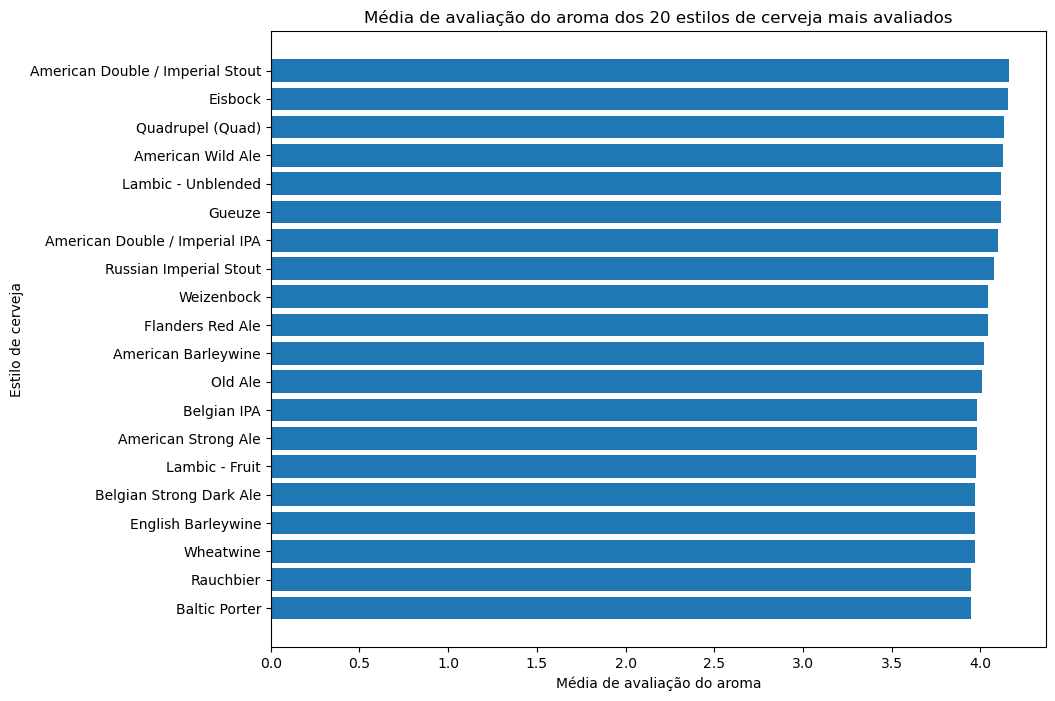

In [63]:
top_20_estilos = agrupamento_nota_aroma_estilo.nlargest(20, 'media_de_avaliacao_aroma_estilo')

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_20_estilos.index, top_20_estilos['media_de_avaliacao_aroma_estilo'], align='center')
ax.set_xlabel('Média de avaliação do aroma')
ax.set_ylabel('Estilo de cerveja')
ax.set_title('Média de avaliação do aroma dos 20 estilos de cerveja mais avaliados')
ax.invert_yaxis()

plt.show()

<p>Podemos observar que o estilo com melhor aroma é a American Double / Imperial Stout<p/>

#### Média de avaliação da nota geral, filtrando por tipo estilo de cerveja

In [ ]:
agrupamento_nota_geral_estilo = dados.groupby(by=[    
    'beer_style',
]).agg(
   media_de_avaliacao_nota_geral_estilo = ('review_overall','mean')
)
agrupamento_nota_geral_estilo = agrupamento_nota_geral_estilo.sort_values(by = 'media_de_avaliacao_nota_geral_estilo', ascending = False)
agrupamento_nota_geral_estilo

,media_de_avaliacao_nota_geral_estilo
beer_style,
American Wild Ale,4.093262
Gueuze,4.086287
Quadrupel (Quad),4.071630
Lambic - Unblended,4.048923
American Double / Imperial Stout,4.029820
...,...
Happoshu,2.914938
Euro Strong Lager,2.862518
Light Lager,2.698833


#### Gráfico mostrando as 20 melhores notas gerais, avaliadas pela seu estilo

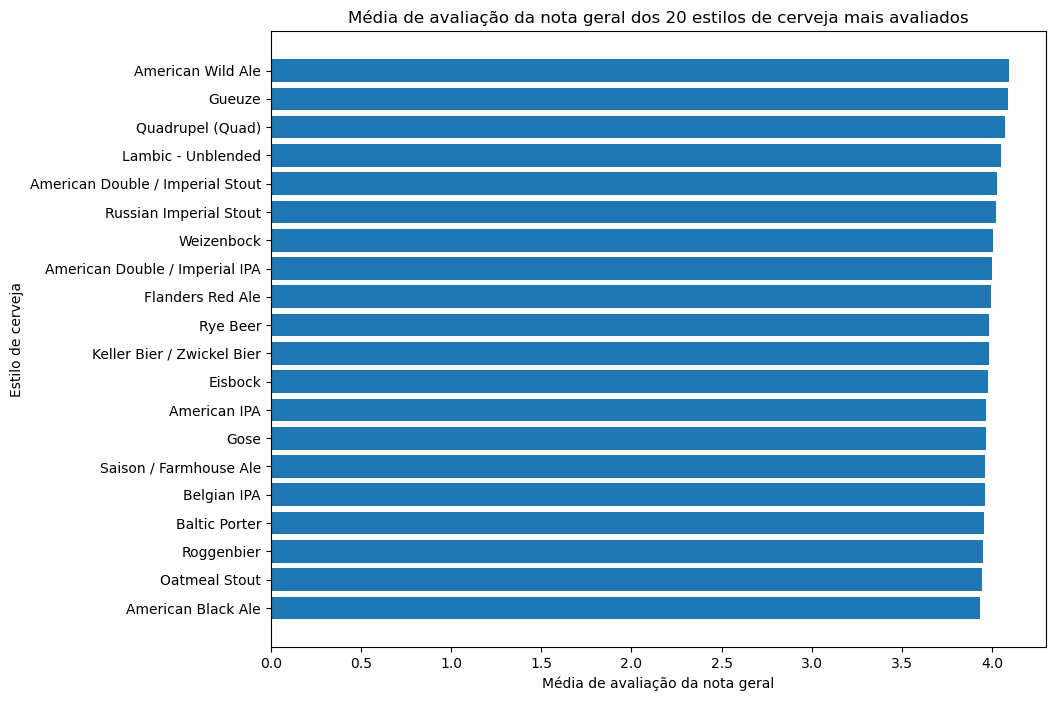

In [71]:
top_20_estilos = agrupamento_nota_geral_estilo.nlargest(20, 'media_de_avaliacao_nota_geral_estilo')

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_20_estilos.index, top_20_estilos['media_de_avaliacao_nota_geral_estilo'], align='center')
ax.set_xlabel('Média de avaliação da nota geral')
ax.set_ylabel('Estilo de cerveja')
ax.set_title('Média de avaliação da nota geral dos 20 estilos de cerveja mais avaliados')
ax.invert_yaxis()

plt.show()

<p>Podemos observar que o estilo com melhor nota geral é a American Wild Ale <p/>

#### Média de avaliação da cerveja que tem a melhor aparência, filtrado pelo estilo da cerveja

In [ ]:
agrupamento_nota_aparencia_estilo = dados.groupby(by=[    
    'beer_style',
]).agg(
   media_de_avaliação_aparencia_estilo = ('review_appearance','mean')
)
agrupamento_nota_aparencia_estilo = agrupamento_nota_aparencia_estilo.sort_values(by = 'media_de_avaliação_aparencia_estilo', ascending = False)
agrupamento_nota_aparencia_estilo

,media_de_avaliação_aparencia_estilo
beer_style,
Russian Imperial Stout,4.210072
American Double / Imperial Stout,4.163633
Quadrupel (Quad),4.117964
American Black Ale,4.112922
American Double / Imperial IPA,4.078916
...,...
Happoshu,2.925311
Low Alcohol Beer,2.917569
American Malt Liquor,2.837834


#### Gráfico mostrando as 20 melhores aparências, avaliadas pela sua estilos

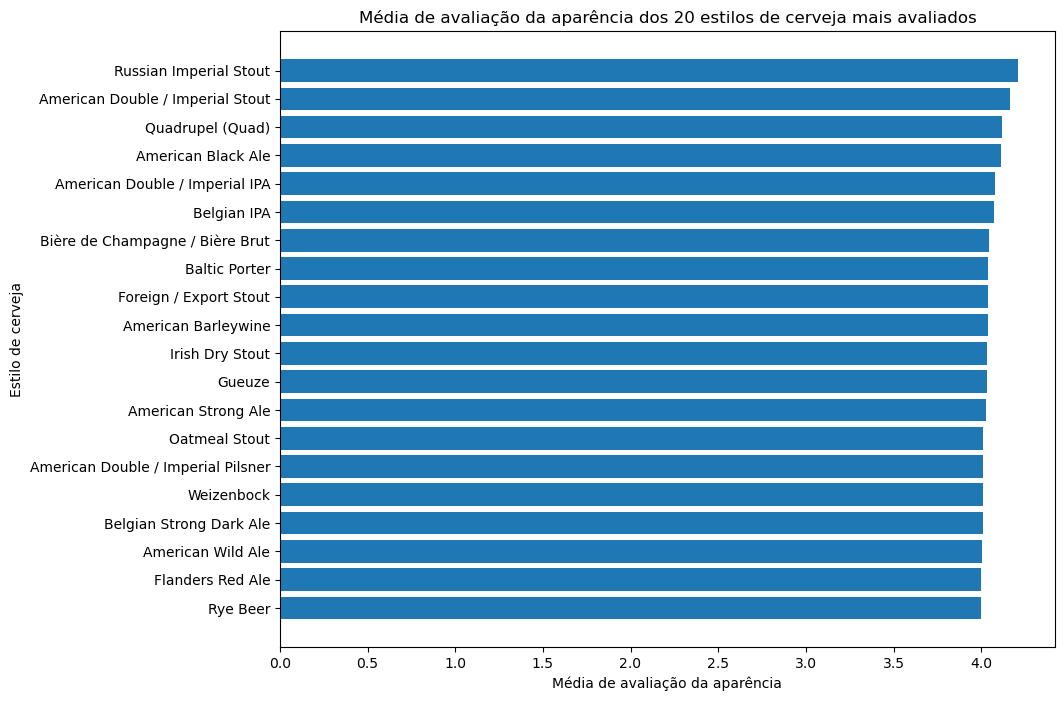

In [81]:
top_20_estilos = agrupamento_nota_aparencia_estilo.nlargest(20, 'media_de_avaliação_aparencia_estilo')

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_20_estilos.index, top_20_estilos['media_de_avaliação_aparencia_estilo'], align='center')
ax.set_xlabel('Média de avaliação da aparência')
ax.set_ylabel('Estilo de cerveja')
ax.set_title('Média de avaliação da aparência dos 20 estilos de cerveja mais avaliados')
ax.invert_yaxis()

plt.show()

<p>Podemos observar que o estilo com melhor aparência é a Russian Imperial Stout<p/>

#### Média de avaliação do palato, filtrado por estilo de cerveja

In [79]:
agrupamento_nota_do_palato_estilo = dados.groupby(by=[    
    'beer_style',
]).agg(
   media_de_avaliação_palato_estilo = ('review_palate','mean')
)
agrupamento_nota_do_palato_estilo = agrupamento_nota_do_palato_estilo.sort_values(by = 'media_de_avaliação_palato_estilo', ascending = False)
agrupamento_nota_do_palato_estilo

,media_de_avaliação_palato_estilo
beer_style,
Quadrupel (Quad),4.124986
Eisbock,4.113594
American Double / Imperial Stout,4.098669
Russian Imperial Stout,4.086922
Gueuze,4.046680
...,...
Happoshu,2.740664
American Adjunct Lager,2.735471
American Malt Liquor,2.653758


#### Gráfico mostrando as 20 melhores palato, avaliadas pela seu estilo

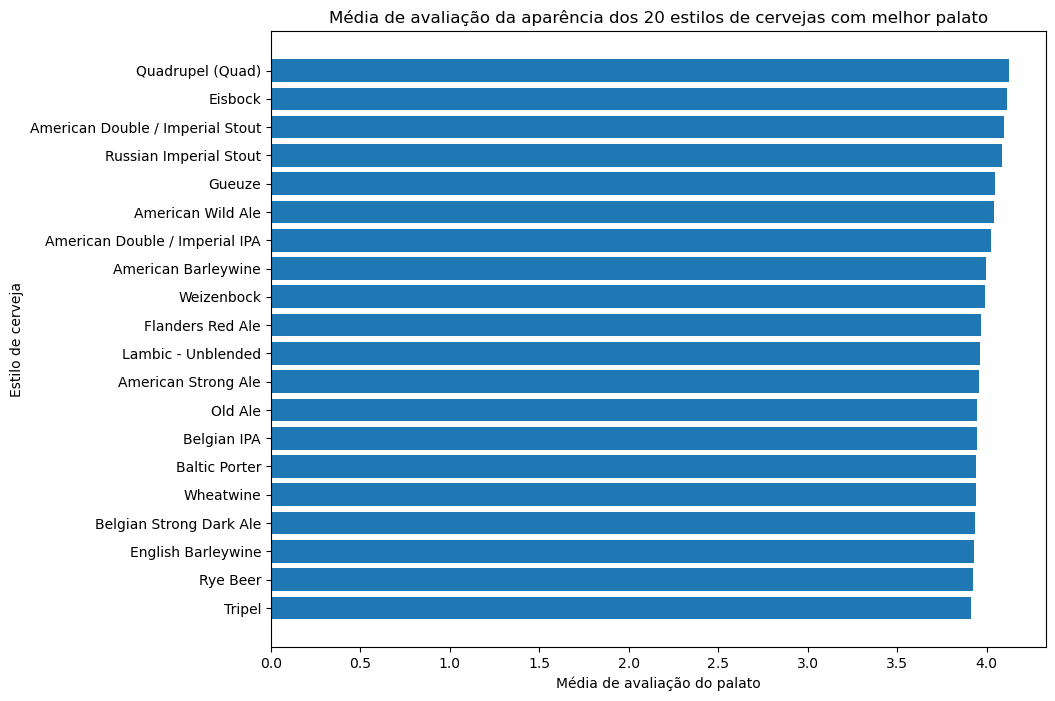

In [83]:
top_20_estilos = agrupamento_nota_do_palato_estilo.nlargest(20, 'media_de_avaliação_palato_estilo')

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_20_estilos.index, top_20_estilos['media_de_avaliação_palato_estilo'], align='center')
ax.set_xlabel('Média de avaliação do palato')
ax.set_ylabel('Estilo de cerveja')
ax.set_title('Média de avaliação da aparência dos 20 estilos de cervejas com melhor palato')
ax.invert_yaxis()

plt.show()

<p>Podemos analisar que o estilo com melhor palato é a Quadrupel(Quad)<p/>

#### Média de avaliação do sabor, filtrado por estilo de cerveja

In [ ]:

agrupamento_nota_do_sabor_estilo = dados.groupby(by=[    
    'beer_style',
]).agg(
   media_de_avaliação_sabor_estilo = ('review_taste','mean')
)
agrupamento_nota_do_sabor_estilo = agrupamento_nota_do_sabor_estilo.sort_values(by = 'media_de_avaliação_sabor_estilo', ascending = False)
agrupamento_nota_do_sabor_estilo

,media_de_avaliação_sabor_estilo
beer_style,
Eisbock,4.211603
Quadrupel (Quad),4.210909
American Double / Imperial Stout,4.187230
American Wild Ale,4.149938
Russian Imperial Stout,4.149569
...,...
American Adjunct Lager,2.683112
Happoshu,2.655602
American Malt Liquor,2.541146


#### Gráfico mostrando as 20 melhores sabores, avaliadas pela seu estilo

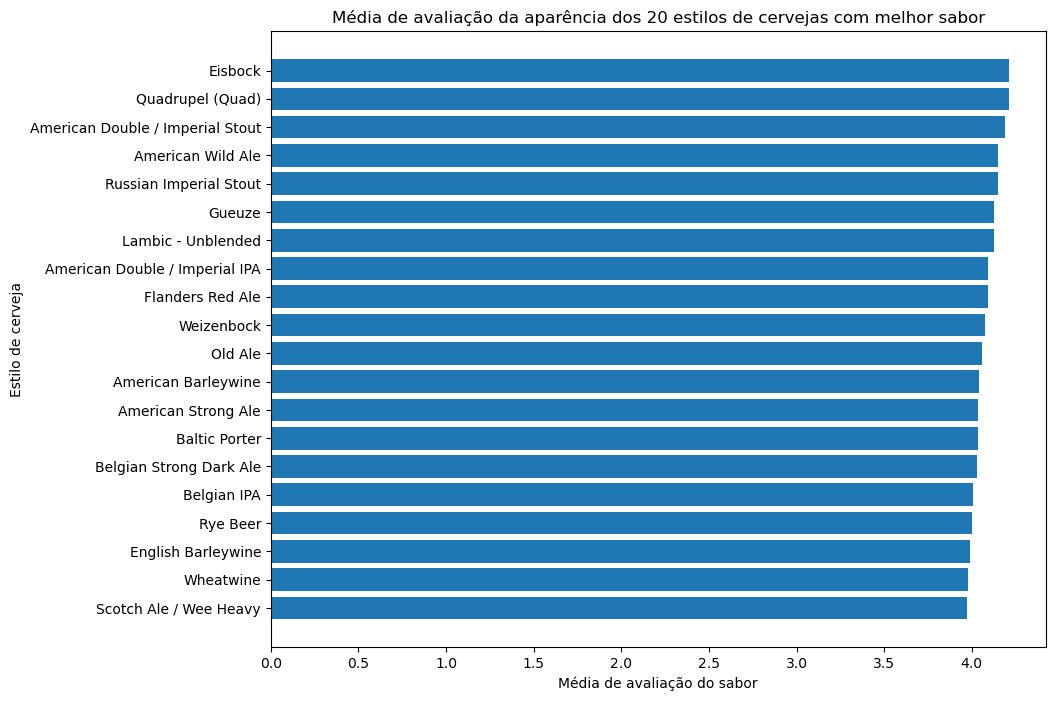

In [88]:
top_20_estilos = agrupamento_nota_do_sabor_estilo.nlargest(20, 'media_de_avaliação_sabor_estilo')

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_20_estilos.index, top_20_estilos['media_de_avaliação_sabor_estilo'], align='center')
ax.set_xlabel('Média de avaliação do sabor')
ax.set_ylabel('Estilo de cerveja')
ax.set_title('Média de avaliação da aparência dos 20 estilos de cervejas com melhor sabor')
ax.invert_yaxis()

plt.show()

<p>Podemos analisar que o estilo com melhor palato é a Eisbock<p/>


#### Média de avaliação do teor alcoolico, filtrado por estilo de cerveja

In [93]:
agrupamento_nota_teor_alcoolico_estilo = dados.groupby(by=[    
    'beer_style',
]).agg(
   media_de_avaliação_teor_alcool_estilo = ('beer_abv','mean')
)
agrupamento_nota_teor_alcoolico_estilo = agrupamento_nota_teor_alcoolico_estilo.sort_values(by = 'media_de_avaliação_teor_alcool_estilo', ascending = False)
agrupamento_nota_teor_alcoolico_estilo

,media_de_avaliação_teor_alcool_estilo
beer_style,
Eisbock,11.392852
English Barleywine,10.918067
American Barleywine,10.703816
Wheatwine,10.662535
Bière de Champagne / Bière Brut,10.622863
...,...
Berliner Weissbier,4.222762
English Dark Mild Ale,4.064484
Light Lager,4.031105


#### Gráfico mostrando as 20 maiores teor alcoólicos, avaliadas pela seu estilo

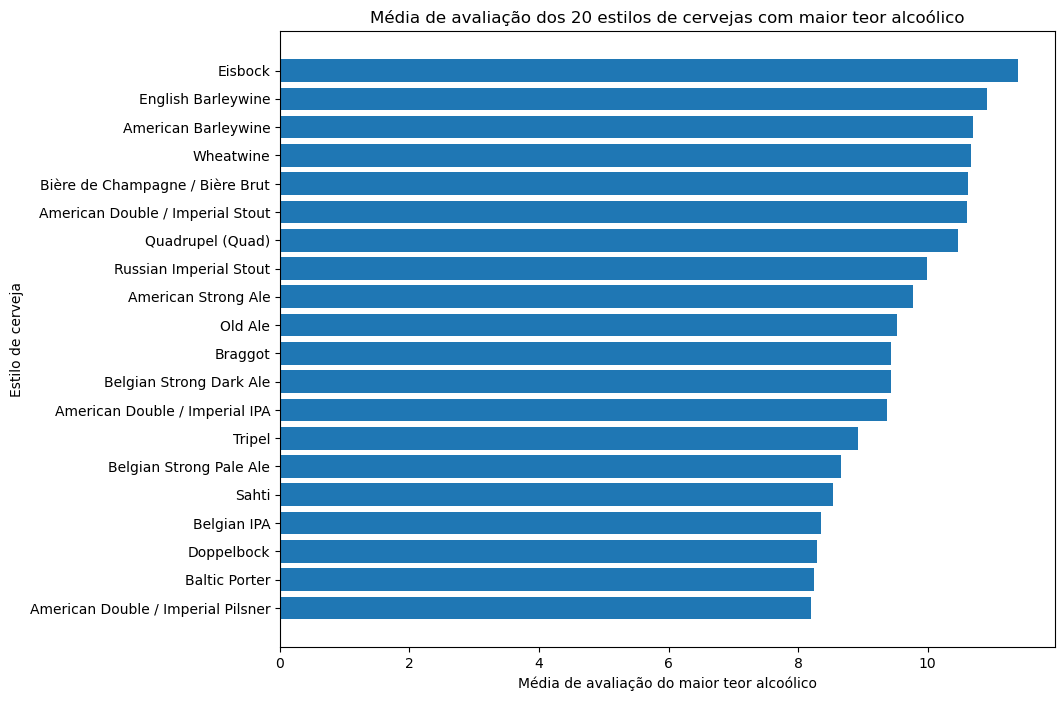

In [143]:
top_20_estilos = agrupamento_nota_teor_alcoolico_estilo.nlargest(20, 'media_de_avaliação_teor_alcool_estilo')

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_20_estilos.index, top_20_estilos['media_de_avaliação_teor_alcool_estilo'], align='center')
ax.set_xlabel('Média de avaliação do maior teor alcoólico')
ax.set_ylabel('Estilo de cerveja')
ax.set_title('Média de avaliação dos 20 estilos de cervejas com maior teor alcoólico')
ax.invert_yaxis()

plt.show()

<p>Podemos obervar que o estilo comm maior teor alcoólico é a Eisbock<p/>

### Agrupamento e agregações por nome das as cervejas
<p> Neste agrupamento percebemos que muitas medias irão das a nota máxima, entao optamos por não realizar os gráficos pois seriam varios resultados iguais <p/>

#### Buscando por todos os nomes de cerveja

In [6]:
nome_cerveja = dados.groupby(by = ['beer_name']).count()
nome_cerveja

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_abv,beer_beerid
beer_name,,,,,,,,,,,,
! (Old Ale),1,1,1,1,1,1,1,1,1,1,1,1
"""100""",5,5,5,5,5,5,5,5,5,5,5,5
"""100"" Pale Ale",1,1,1,1,1,1,1,1,1,1,1,1
"""12"" Belgian Golden Strong Ale",2,2,2,2,2,2,2,2,2,2,2,2
"""33"" Export",3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
Žamberecký Kanec Imperial Stout,2,2,2,2,2,2,2,2,2,2,2,2
Ω-naught (Omeganaught),3,3,3,3,3,3,3,3,3,3,3,3
“Chewy” Double IPA,1,1,1,1,1,1,1,1,1,1,1,1


#### Cervejas com as mehores notas gerais, filtrado pelo nome da cerveja

In [102]:
agrupamento_nota_geral_cerveja = dados.groupby(by=[    
    'beer_name',
]).agg(
   media_de_avaliação_nota_geral_cerveja = ('review_overall','mean')
)
agrupamento_nota_geral_cerveja = agrupamento_nota_geral_cerveja.sort_values(by = 'media_de_avaliação_nota_geral_cerveja', ascending = False)
agrupamento_nota_geral_cerveja

,media_de_avaliação_nota_geral_cerveja
beer_name,
Taeberry Boch,5.0
Wasatch Irish Stout,5.0
"Pale Ale S.C.A.G. (Simcoe, Columbus, Amarillo & Galaxy)",5.0
Distorter Porter,5.0
Louwaege's Stout,5.0
...,...
Ndovu Special Malt,1.0
Senkainama,1.0
Hugh Hefeweizen's Playmate Of The Wheat,1.0


#### Aqui está um exemplo do motivo no qual não foi feito gráficos

In [103]:
top_20_estilos = agrupamento_nota_geral_cerveja.nlargest(20, 'media_de_avaliação_nota_geral_cerveja')
print(top_20_estilos)

                                                    media_de_avaliação_nota_geral_cerveja
beer_name                                                                                
Taeberry Boch                                                                         5.0
Wasatch Irish Stout                                                                   5.0
Pale Ale S.C.A.G. (Simcoe, Columbus, Amarillo &...                                    5.0
Distorter Porter                                                                      5.0
Louwaege's Stout                                                                      5.0
Belgian Country Pale Ale                                                              5.0
Cappy's Cherry Wheat                                                                  5.0
C. Brown's Pumpkin Ale                                                                5.0
John's Mild Bitter                                                                    5.0
Raspberry 

#### Cervejas com os melhores aromas, filtrado pelo nome da cerveja

In [31]:
agrupamento_nota_aroma = dados.groupby(by=[    
    'beer_name',
]).agg(
   media_de_avaliação_nota_aroma = ('review_aroma','mean')
)
agrupamento_nota_aroma = agrupamento_nota_aroma.sort_values(by = 'media_de_avaliação_nota_aroma', ascending = False)
agrupamento_nota_aroma

,media_de_avaliação_nota_aroma
beer_name,
Southampton Belgian Red Ale,5.0
Mittenwalder Werdenfelser Weisse,5.0
Barrel Aged Stout,5.0
1100.0,5.0
Presciption Pils,5.0
...,...
Cocka-Too,1.0
Vagrant's Choice,1.0
Ben Franklin Brown,1.0


#### Cervejas com as melhores aparências, filtrado pelo nome da cerveja

In [32]:
agrupamento_nota_aparencia = dados.groupby(by=[    
    'beer_name',
]).agg(
   media_de_avaliação_nota_aparencia = ('review_appearance','mean')
)
agrupamento_nota_aparencia = agrupamento_nota_aparencia.sort_values(by = 'media_de_avaliação_nota_aparencia', ascending = False)
agrupamento_nota_aparencia

,media_de_avaliação_nota_aparencia
beer_name,
Tall Tale Pale Ale (dry-hopped With Glacier),5.0
Portsmouth Crazed Cossack Russian Imperial Stout,5.0
Heaven And Hell Barleywine,5.0
Haunted Series Russian Imperial Stout,5.0
Harvest Moon Amber,5.0
...,...
Swan MID,1.0
Clausthaler Radler,1.0
Persico,1.0


#### Cervejas com o melhor palato, filtrado pelo nome da cerveja

In [34]:
agrupamento_nota_palato = dados.groupby(by=[    
    'beer_name',
]).agg(
   media_de_avaliação_nota_palato = ('review_palate','mean')
)
agrupamento_nota_palato = agrupamento_nota_palato.sort_values(by = 'media_de_avaliação_nota_palato', ascending = False)
agrupamento_nota_palato

,media_de_avaliação_nota_palato
beer_name,
Edsten Double Plus,5.0
Hopfenhammer German IPA,5.0
Hidden Agenda,5.0
508 Montezuma Imperial Stout,5.0
The Hooligan King,5.0
...,...
Swan MID,1.0
Snow Leopard Ice,1.0
Cerveza De La Casa,1.0


#### Cervejas com o melhor sabor, filtrado pelo nome da cerveja

In [35]:
agrupamento_nota_sabor = dados.groupby(by=[    
    'beer_name',
]).agg(
   media_de_avaliação_nota_sabor = ('review_taste','mean')
)
agrupamento_nota_sabor = agrupamento_nota_sabor.sort_values(by = 'media_de_avaliação_nota_sabor', ascending = False)
agrupamento_nota_sabor

,media_de_avaliação_nota_sabor
beer_name,
The Ascent,5.0
Oak Aged Old Dipsea Barleywine,5.0
Three Sheets Barley Wine Blend (1996 & 2006),5.0
Princess Ale,5.0
Jasper Murdock's Private Stock '04,5.0
...,...
Hugh Hefeweizen's Playmate Of The Wheat,1.0
Bondi Red Natural Ale,1.0
Cairns Draught,1.0


#### Cerveja com maior teor alcoólico, filtrado pelo nome da cerveja

In [113]:
agrupamento_nota_teor_alcoolico_cerveja = dados.groupby(by=[    
    'beer_name',
]).agg(
   media_de_avaliação_teor_alcoolico = ('beer_abv','mean')
)
agrupamento_nota_teor_alcoolico_cerveja = agrupamento_nota_teor_alcoolico_cerveja.sort_values(by = 'media_de_avaliação_teor_alcoolico', ascending = False)
agrupamento_nota_teor_alcoolico_cerveja

,media_de_avaliação_teor_alcoolico
beer_name,
Schorschbräu Schorschbock 57%,57.70
Schorschbräu Schorschbock 43%,43.00
Sink The Bismarck!,41.00
Schorschbräu Schorschbock 40%,39.44
Black Damnation VI - Messy,39.00
...,...
Zwölf Aposteln Pils,NaN
Zydeco Zipper,NaN
Öko Pilsner,NaN


#### Gráfico mostrando as 20 maiores teor alcoólicos, avaliadas pelo seu nome

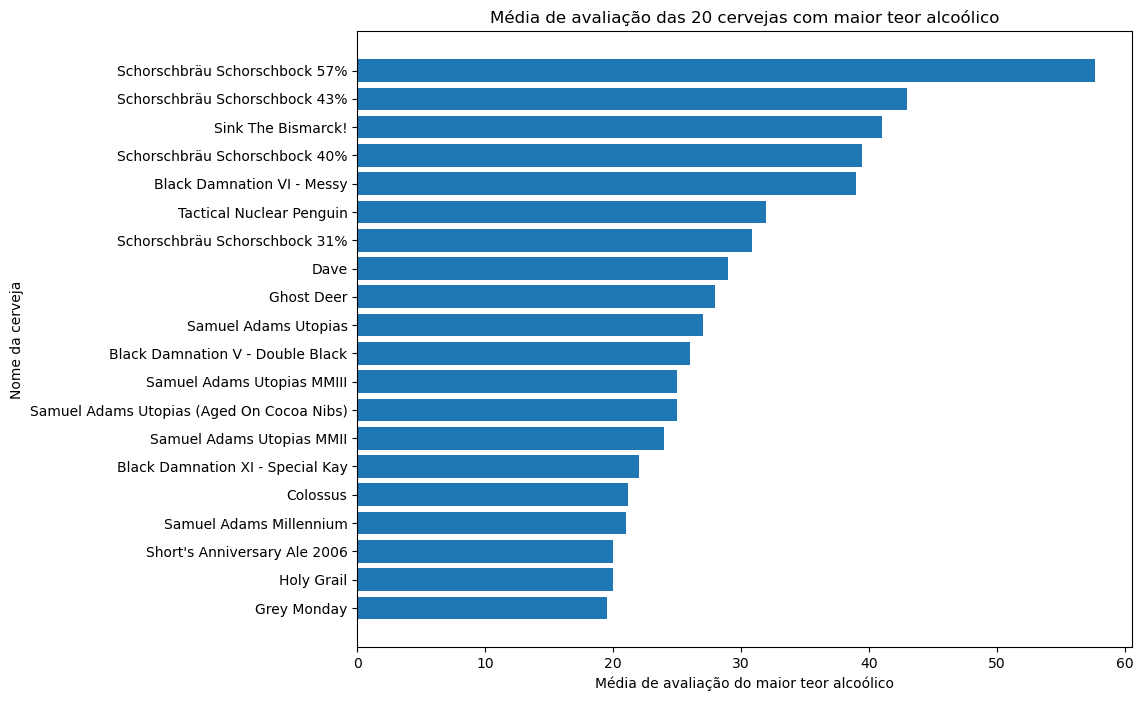

In [142]:
top_20_estilos = agrupamento_nota_teor_alcoolico_cerveja.nlargest(20, 'media_de_avaliação_teor_alcoolico')

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_20_estilos.index, top_20_estilos['media_de_avaliação_teor_alcoolico'], align='center')
ax.set_xlabel('Média de avaliação do maior teor alcoólico')
ax.set_ylabel('Nome da cerveja')
ax.set_title('Média de avaliação das 20 cervejas com maior teor alcoólico')
ax.invert_yaxis()

plt.show()

<p> Podemos analisar que a cerveja com maior teor alcoólico é a Schorschbräu Schorschbock 57% <p/>

### Agrupado por nome das cervejarias
<p> Neste agrupamento percebemos que muitas medias irão das a nota máxima, entao optamos por não realizar os gráficos pois seriam varios resultados iguais <p/>

#### Buscando por todos os nomes de cervejarias


In [21]:
total_cervejaria = dados.groupby(by = ['brewery_name']).count()
total_cervejaria

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
brewery_name,,,,,,,,,,,,
't Hofbrouwerijke,37,37,37,37,37,37,37,37,37,37,37,37
(512) Brewing Company,304,304,304,304,304,304,304,304,304,304,296,304
10 Barrel Brewing Co.,84,84,84,84,84,84,84,84,84,84,78,84
1516 Brewing Company,34,34,34,34,34,34,34,34,34,34,15,34
16 Mile Brewing Company,92,92,92,92,92,92,92,92,92,92,92,92
...,...,...,...,...,...,...,...,...,...,...,...,...
Ölvisholt Brugghús,97,97,97,97,97,97,97,97,97,97,97,97
Öufi Brauerei,1,1,1,1,1,1,1,1,1,1,1,1
Ølfabrikken,586,586,586,586,586,586,586,586,586,586,586,586


#### Média de avaliação do aroma, filtrando cervejaria


In [53]:
agrupamento_nota_geral_cervejaria = dados.groupby(by=[    
    'brewery_name',
]).agg(
   media_de_avaliação_aroma_cervejaria = ('review_aroma','mean')
)
agrupamento_nota_geral_cervejaria = agrupamento_nota_geral_cervejaria.sort_values(by = 'media_de_avaliação_aroma_cervejaria', ascending = False)
agrupamento_nota_geral_cervejaria

,media_de_avaliação_aroma_cervejaria
brewery_name,
Thai Me Up,5.0
Hops & Grain,5.0
Tobiishi Kikai Sangyo,5.0
Binghams Brewery,5.0
Pang Pang Brewery,5.0
...,...
Jyohana Beer,1.0
Keroche Breweries Limited,1.0
Miyamori Brauhaus,1.0


#### Média de avaliação da nota geral, filtrando por cervejaria

In [54]:
agrupamento_nota_geral_cervejaria = dados.groupby(by=[    
    'brewery_name',
]).agg(
   media_de_avaliação_nota_geral_cervejaria = ('review_overall','mean')
)
agrupamento_nota_geral_cervejaria = agrupamento_nota_geral_cervejaria.sort_values(by = 'media_de_avaliação_nota_geral_cervejaria', ascending = False)
agrupamento_nota_geral_cervejaria

,media_de_avaliação_nota_geral_cervejaria
brewery_name,
Weissbräu Kösslarn,5.0
Hakone Beer,5.0
Restaurant Flieger Bräu,5.0
Facer's Flintshire Brewery,5.0
Brauerei Gasthof Pfister GmbH,5.0
...,...
Bières De Carcassonne,1.0
Red Dot Brewhouse,1.0
Hakodate Beer,1.0


#### Média de avaliação da cerveja que tem a melhor aparência, filtrado por cervejaria

In [56]:
agrupamento_nota_aparencia_cervejaria = dados.groupby(by=[    
    'brewery_name',
]).agg(
   media_de_avaliação_aparencia_cervejaria = ('review_appearance','mean')
)
agrupamento_nota_aparencia_cervejaria = agrupamento_nota_aparencia_cervejaria.sort_values(by = 'media_de_avaliação_aparencia_cervejaria', ascending = False)
agrupamento_nota_aparencia_cervejaria

,media_de_avaliação_aparencia_cervejaria
brewery_name,
Bones Brewing,5.0
The Cellar Grill,5.0
Brauerei Klaus Rauh GmbH,5.0
Tobiishi Kikai Sangyo,5.0
Lautertaler Hausbrauerei,5.0
...,...
Gold Coast Brewpub,1.5
Pivovariya Solenoukhov,1.0
Miyamori Brauhaus,1.0


#### Média de avaliação do palato, filtrado por cervejaria

In [57]:
agrupamento_nota_do_palato_cervejaria = dados.groupby(by=[    
    'brewery_name',
]).agg(
   media_de_avaliação_palato_cervejaria = ('review_palate','mean')
)
agrupamento_nota_do_palato_cervejaria = agrupamento_nota_do_palato_cervejaria.sort_values(by = 'media_de_avaliação_palato_cervejaria', ascending = False)
agrupamento_nota_do_palato_cervejaria

,media_de_avaliação_palato_cervejaria
brewery_name,
Rascal Creek Brewing Co.,5.0
Brauerei Gundel,5.0
Edsten Brewing Company,5.0
H.Nettelbeck KG,5.0
Weissbräu Kösslarn,5.0
...,...
Miyamori Brauhaus,1.0
Red Dot Brewhouse,1.0
Dednovo Brewery,1.0


#### Média de avaliação do sabor, filtrado por cervejaria

In [58]:

agrupamento_nota_do_sabor_cervejaria = dados.groupby(by=[    
    'brewery_name',
]).agg(
   media_de_avaliação_sabor_cervejaria = ('review_taste','mean')
)
agrupamento_nota_do_sabor_cervejaria = agrupamento_nota_do_sabor_cervejaria.sort_values(by = 'media_de_avaliação_sabor_cervejaria', ascending = False)
agrupamento_nota_do_sabor_cervejaria

,media_de_avaliação_sabor_cervejaria
brewery_name,
Elizabeth Street Brewery,5.0
Binghams Brewery,5.0
Ludwig Roth Bierbrauerei GmbH,5.0
Hakone Beer,5.0
The Cellar Grill,5.0
...,...
Duneland,1.0
Cervejaria Bruge,1.0
Bières De Carcassonne,1.0


#### Média de avaliação do teor alcoolico, filtrado por cervejaria

In [138]:
agrupamento_nota_teor_alcoolico_cervejaria = dados.groupby(by=[    
    'brewery_name',
]).agg(
   media_de_avaliação_teor_alcool_cervejaria_ = ('beer_abv','mean')
)
agrupamento_nota_teor_alcoolico_cervejaria = agrupamento_nota_teor_alcoolico_cervejaria.sort_values(by = 'media_de_avaliação_teor_alcool_cervejaria_', ascending = False)
agrupamento_nota_teor_alcoolico_cervejaria

,media_de_avaliação_teor_alcool_cervejaria_
brewery_name,
Schorschbräu,19.228824
Shoes Brewery,15.200000
Rome Brewing Company,13.840000
Hurlimann Brewery,13.750000
Alt-Oberurseler Brauhaus,13.200000
...,...
Yellow Rose Brewing Company,NaN
Yozgut Bira Fabrikasi / Tekel Birasi,NaN
Yuiga Doxon Ji Beer,NaN


#### Gráfico mostrando as 20 maiores teor alcoólicos, avaliadas pela cervejaria

C:\Users\luuu_\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


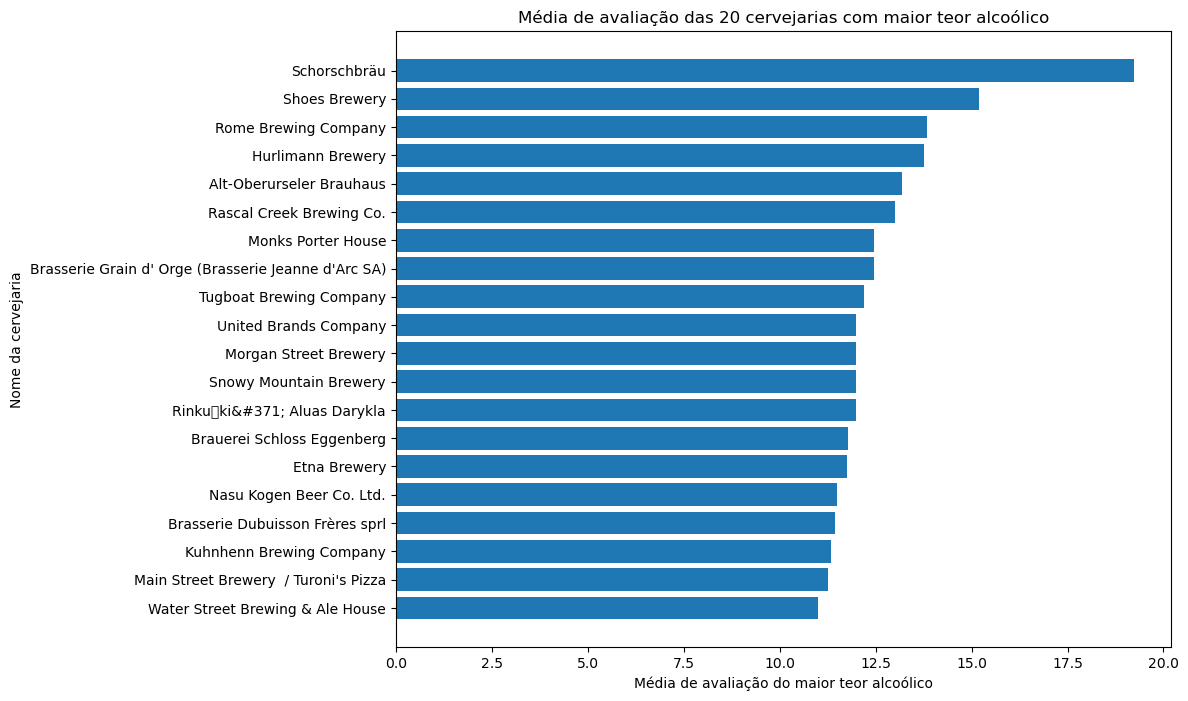

In [144]:
top_20_estilos = agrupamento_nota_teor_alcoolico_cervejaria.nlargest(20, 'media_de_avaliação_teor_alcool_cervejaria_')

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_20_estilos.index, top_20_estilos['media_de_avaliação_teor_alcool_cervejaria_'], align='center')
ax.set_xlabel('Média de avaliação do maior teor alcoólico')
ax.set_ylabel('Nome da cervejaria')
ax.set_title('Média de avaliação das 20 cervejarias com maior teor alcoólico')
ax.invert_yaxis()

plt.show()

<p>Podemos analisar que a cervejaria que tem a maior média de teor alcoólico é a Schorschbräu</p>

### Avaliadores


In [145]:
avaliacoes_por_avaliador = dados['review_profilename'].value_counts().sort_values(ascending=False)
print(avaliacoes_por_avaliador)

northyorksammy    5817
BuckeyeNation     4661
mikesgroove       4617
Thorpe429         3518
womencantsail     3497
                  ... 
varom                1
Nickyb567            1
Jorex                1
markymark88          1
joeebbs              1
Name: review_profilename, Length: 33387, dtype: int64


#### Busca pelos avaliadores que realizaram mais de 2500 avaliações

In [152]:
avaliadores = dados.groupby('review_profilename').size().reset_index(name='avaliações')
total_avaliadores = avaliadores[avaliadores['avaliações'] > 2500]
                                                         
total_avaliadores

,review_profilename,avaliações
934,BEERchitect,2946
2351,BuckeyeNation,4661
2757,ChainGangGuy,3471
4990,Gavage,2630
5348,Gueuzedude,2938
8555,Mora2000,2594
8949,NeroFiddled,3488
9697,Phyl21ca,3179
12225,TheManiacalOne,2659
12378,Thorpe429,3518


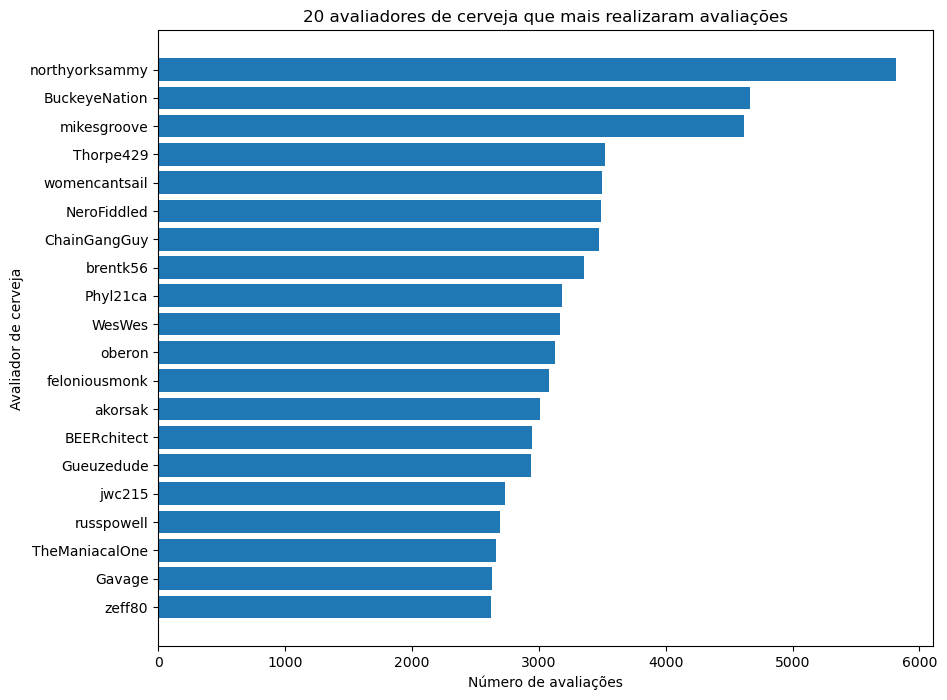

In [159]:
top_20_avaliadores = dados['review_profilename'].value_counts().nlargest(20)
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_20_avaliadores.index, top_20_avaliadores.values, align='center')

ax.set_xlabel('Número de avaliações')
ax.set_ylabel('Avaliador de cerveja')
ax.set_title('20 avaliadores de cerveja que mais realizaram avaliações')
ax.invert_yaxis()

plt.show()